<h1 font_color='Red'> Importing Required Libraries </h1>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Description of the Data Used

The comprehensive NASDAQ Global Index Family covers international securities segmented by geography, sector, and size. NASDAQ OMX's transparent and rules-based selection method results in a complete representation of the global investable equity marketplace. The indexes cover 45 individual countries within Developed and Emerging Markets, and facilitate a multitude of tracking, trading, and investing opportunities.

* Data has been taken from Quandl.com and the link for the Data is https://www.quandl.com/data/NASDAQOMX/XNDXT25NNER
* The Dats is refreshed daily
* <b>Terms of Use</b>: This data cannot be republished or used as the basis of a financial product without the permission of Nasdaq OMX.

In [2]:
data = pd.read_csv('Nasdaq.csv') #reading the data from a csv file

## Performing Simple Data Exploration

In [3]:
data.head()  #checking the data

,Trade Date,Index Value,High,Low,Total Market Value,Dividend Market Value
0,2019-02-25,1132.17,1142.08,1131.64,3.081582e+09,589239.0
1,2019-02-22,1128.76,1129.50,1121.63,3.072873e+09,0.0
2,2019-02-21,1120.01,1127.42,1116.46,3.049053e+09,0.0
3,2019-02-20,1127.28,1132.21,1124.92,3.068854e+09,536844.0
4,2019-02-19,1124.64,1128.14,1122.33,3.062208e+09,0.0


In [5]:
data.shape 

(288, 6)

In [6]:
data.isna().sum()  #Checking for any null values

Trade Date               0
Index Value              0
High                     0
Low                      0
Total Market Value       0
Dividend Market Value    0
dtype: int64

In [7]:
type(data['Trade Date'][0])   # checking the datatype of Trade Date

str

<b><u>Since the Data Type of Date is str, It will be very convenient for us to convert it into python pandas Date Time datatype, then it will be easier to handle dates when plotting our graphs</u></b>

In [8]:
data['Trade Date'] = pd.to_datetime(data['Trade Date'],format = '%Y-%m-%d')
type(data['Trade Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

## It will be better to use 'Trade Date' as index and The Data is sorted in descending order of Dates, we will sort it in chronological order( Ascending Order)

In [9]:
data = data.set_index('Trade Date')
data = data.sort_index(axis=0 ,ascending=True)

In [10]:
data.head()   #now checking the data once again to see how it looks after processing

,Index Value,High,Low,Total Market Value,Dividend Market Value
Trade Date,,,,,
2018-01-02,1070.41,1070.87,1056.22,2.535237e+09,0.0
2018-01-03,1079.29,1079.99,1072.64,2.556269e+09,0.0
2018-01-04,1084.43,1087.39,1078.32,2.568433e+09,0.0
2018-01-05,1096.00,1096.96,1087.97,2.595847e+09,0.0
2018-01-08,1099.60,1100.79,1093.93,2.604358e+09,0.0


<h1 style='color:red'>Now The Implementation of Moving Averages Crossover Strategy Begins</h1>

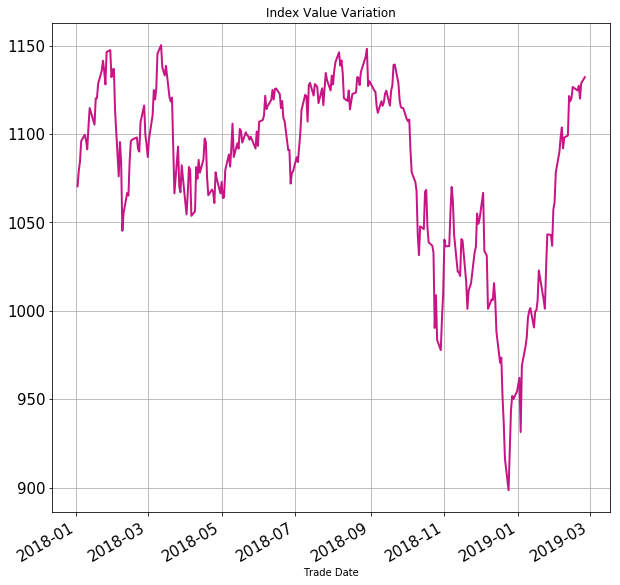

In [34]:
data['Index Value'].plot(grid=True,figsize=(10,10),color='mediumvioletred',lw=2.
                        ,fontsize=15,title ="Index Value Variation")  #plotting the graph of Index Value to check the Data
plt.show()

<b> In Moving Averages Crossover Strategy, We have to choose two separate Simple Moving Averages (SMA) of a time series with differing time periods, let’s say, 20 days and 40 days. If the short moving average exceeds the long moving average then it gives <b style='color:green'>buy</b> signal, if the long moving average exceeds the short moving average then it gives the <b style='color:red'>sell</b> signal.<b>

In [31]:
short_ma = 20   #short moving average
long_ma = 40    #long moving average

#Now we create a new Dataframe with the indexes of data, which will detect buy sell signals
detector = pd.DataFrame(index = data.index)  
detector['signal'] = 0.0

#Now adding short and long term moving averages to the new dataFrame detector
detector['Short_MA'] = data['Index Value'].rolling(window=short_ma,min_periods=1,center=False).mean()  
detector['Long_MA'] = data['Index Value'].rolling(window=long_ma,min_periods=1,center=False).mean() 

#Now finding the places where the Short Moving Average crosses the Long Moving Averages
detector['signal'][short_ma:] = np.where(detector['Short_MA'][short_ma:] > detector['Long_MA'][short_ma:],1.0,0.0)

#Now Finding the positons where the crossover takes place
detector['pos'] = detector['signal'].diff()

#detector


<b>We have our required DataFrame.</b>
<p><b>Now, The Last thing left is to plot it, and then mark the <b style="color:green">Buy</b> and <b style="color:red">Sell</b> signals


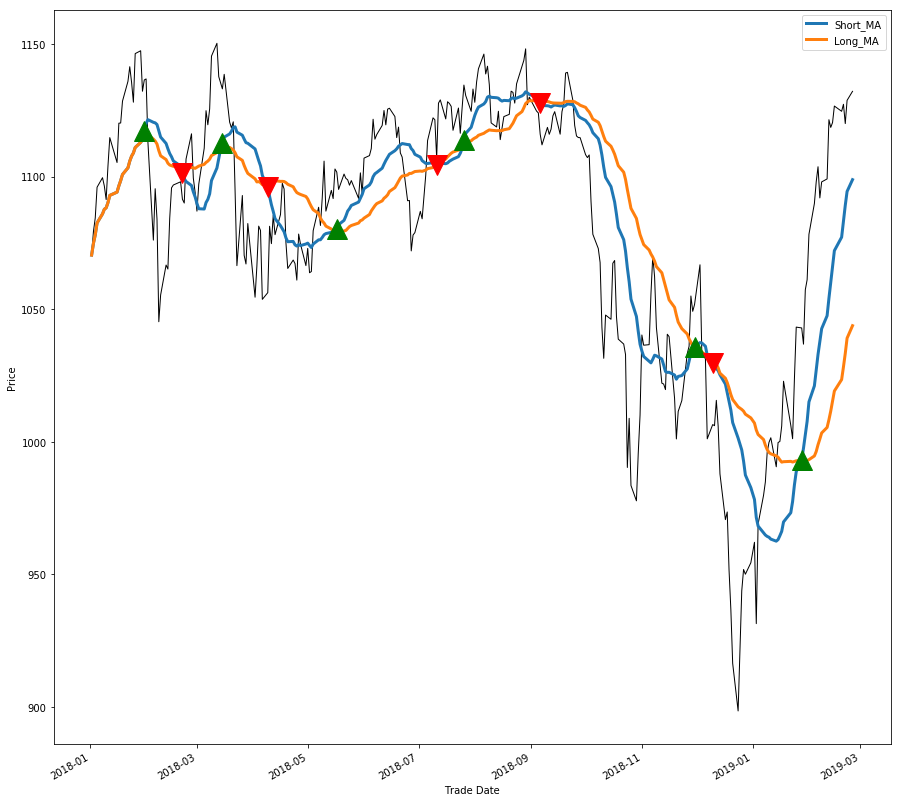

In [40]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(111, ylabel = 'Price',xlabel='Trade Date')

data['Index Value'].plot(ax = ax1, color='black',lw = 1.)

detector[['Short_MA','Long_MA']].plot(ax=ax1,lw=3.)

ax1.plot(detector.loc[detector.pos == 1.0].index,detector.Short_MA[detector.pos == 1.0],'^',markersize=20,color='g')

ax1.plot(detector.loc[detector.pos==-1.0].index,detector.Short_MA[detector.pos==-1.0],'v',markersize=20,color='r')
plt.show()

<h2> In the above graph, the Green upright triangle gives a buy signal, and the Red downright triangle gives a sell signal </h2>

<br><br>
This is the end of this Notebook, Thank you for your time
<br><br>